<img src="seekingalpha.png" style="float: left; margin: 20px; height: 55px">

# Notebook 6- Introduction to Preprocessing & Natural Language Processing

_The idea of transforming raw text into data readable by machine learning algporithms_

---
### Notebook Summary
1. Uncleaned Analysis
    - Word Frequencies and Word Clouds
    - Emphasizing necessity for preprocessing to filter out unpredictive words 
2. Introduction to Preprocessing Steps & Natural Language Processing
    - Removing punctuation
    - Converting to lowercase
    - Removing stopwords (via Natural Language Toolkit)
3. Preprocessing Raw Text
    - Combining Preprocessing Steps into Function
    - Applying Function to Article Content
4. Cleaned Analysis
    - Revisiting Word Frequencies
---
#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing Scraped Article Content 

In [2]:
natural_language = pd.read_csv('nl.csv')
natural_language.drop('Unnamed: 0',axis=1,inplace=True)

#### & Take a Look At The First Few Rows 

In [3]:
natural_language.head()

,index,0
0,0,Undeterred by Apple's (NASDAQ:AAPL) pronouncem...
1,1,\n\nStop me if you've heard this one before. ...
2,2,"In an interview with the New York Times, ventu..."
3,3,\n\n Apple (NASDAQ:AAPL) investors have long b...
4,4,According to AJ Dellinger of International Bus...


---
## 1. Uncleaned Analysis
_Prior to Preprocessing Steps_
 
- Top 50 Word Frequencies
- Word Cloud
- Understanding the need for preprocessing before building machine learning algorithms
---

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]), <a list of 9 Text yticklabel objects>)

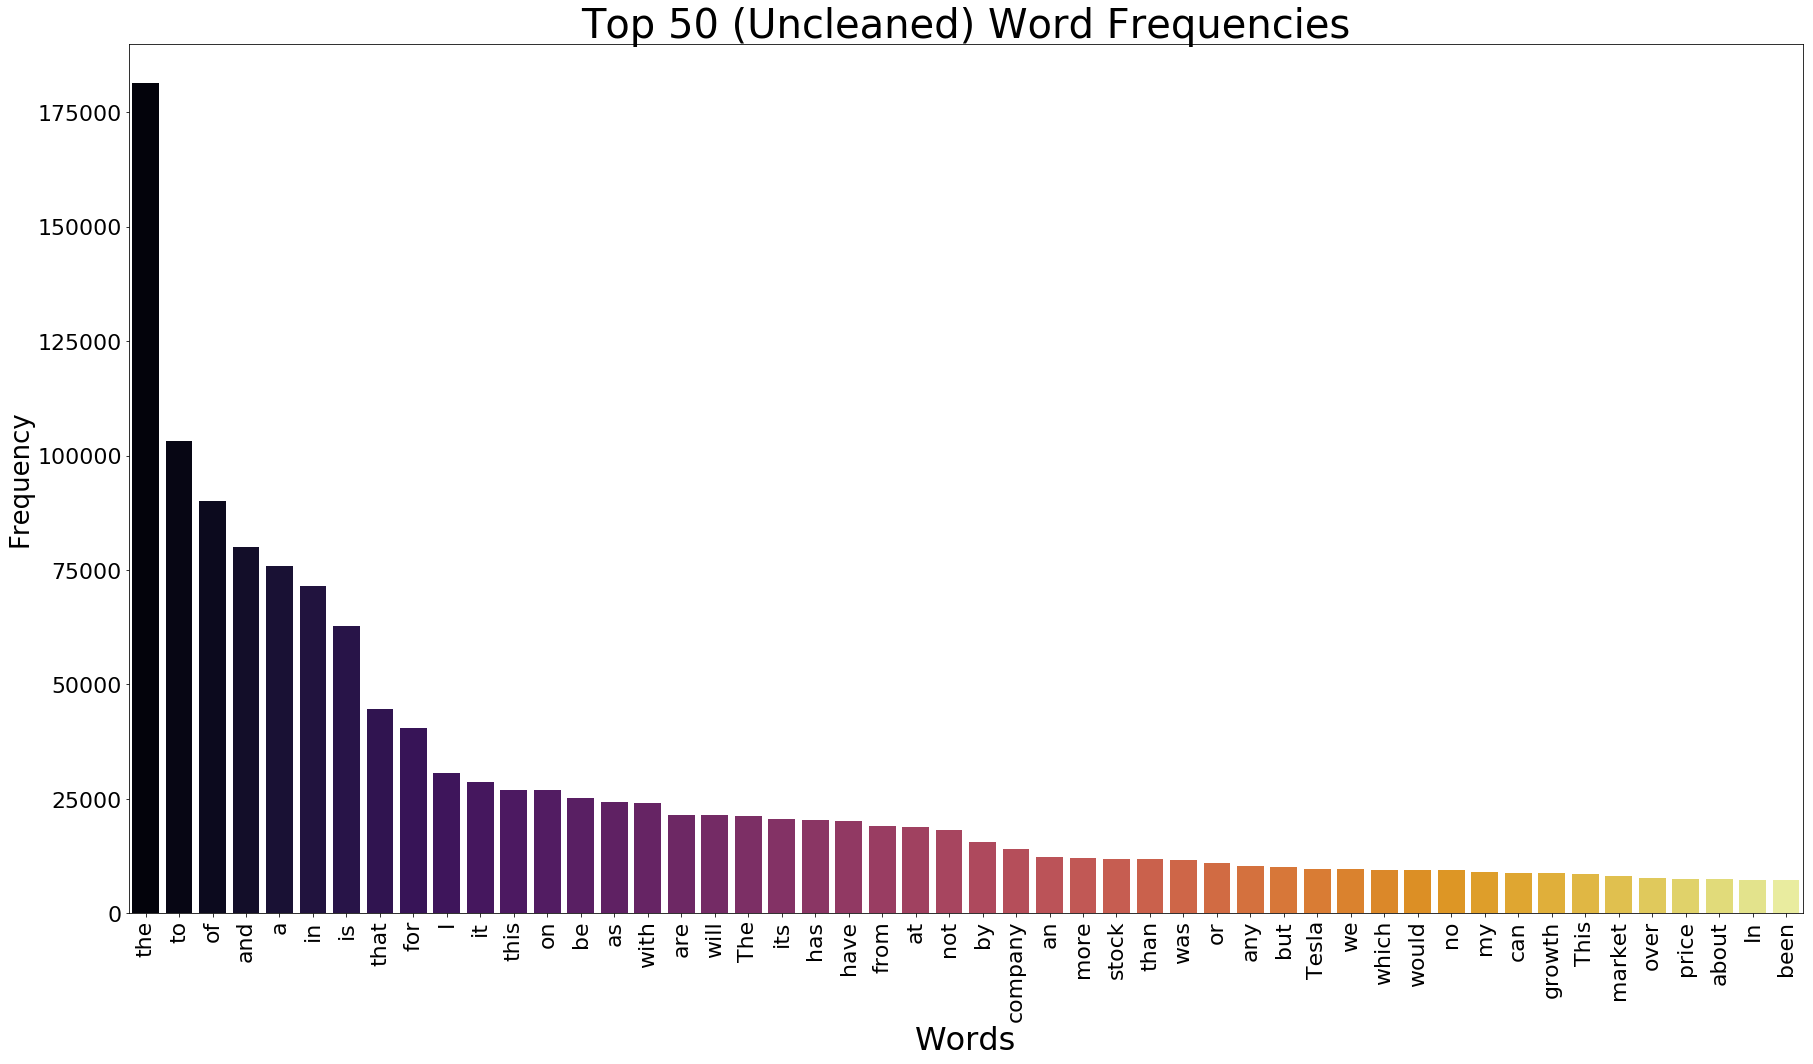

In [6]:
natural_language_uncleaned = natural_language['0'] # compiling list of all article text from 'natural_language'

# Calcuating value counts for each word- Top 50 frequencies 
natural_language_uncleaned = natural_language_uncleaned.str.split(expand=True).unstack().value_counts().head(50)

# Creating bar graph to visualize

plt.figure(figsize=(30,16))
sns.barplot(x = natural_language_uncleaned.index.values,
            y = natural_language_uncleaned.values,
            palette= 'inferno')

plt.xlabel('Words',fontsize=32)
plt.ylabel('Frequency',fontsize=26)
plt.ylim(0,190000)
plt.title('Top 50 (Uncleaned) Word Frequencies',fontsize=40)
plt.xticks(rotation=90,fontsize=22)
plt.yticks(fontsize=22)

In [7]:
natural_language_uncleaned[:11]

the     181412
to      103087
of       90032
and      80081
a        75766
in       71535
is       62808
that     44553
for      40520
I        30742
it       28788
dtype: int64

- Without preprocessing word frequencies don't bring much to the table.
- Currently, words are those that would be found in almost any other English text
- Let's explore another fun visualization tool to demonstrate.

#### Word Cloud

(-0.5, 399.5, 199.5, -0.5)

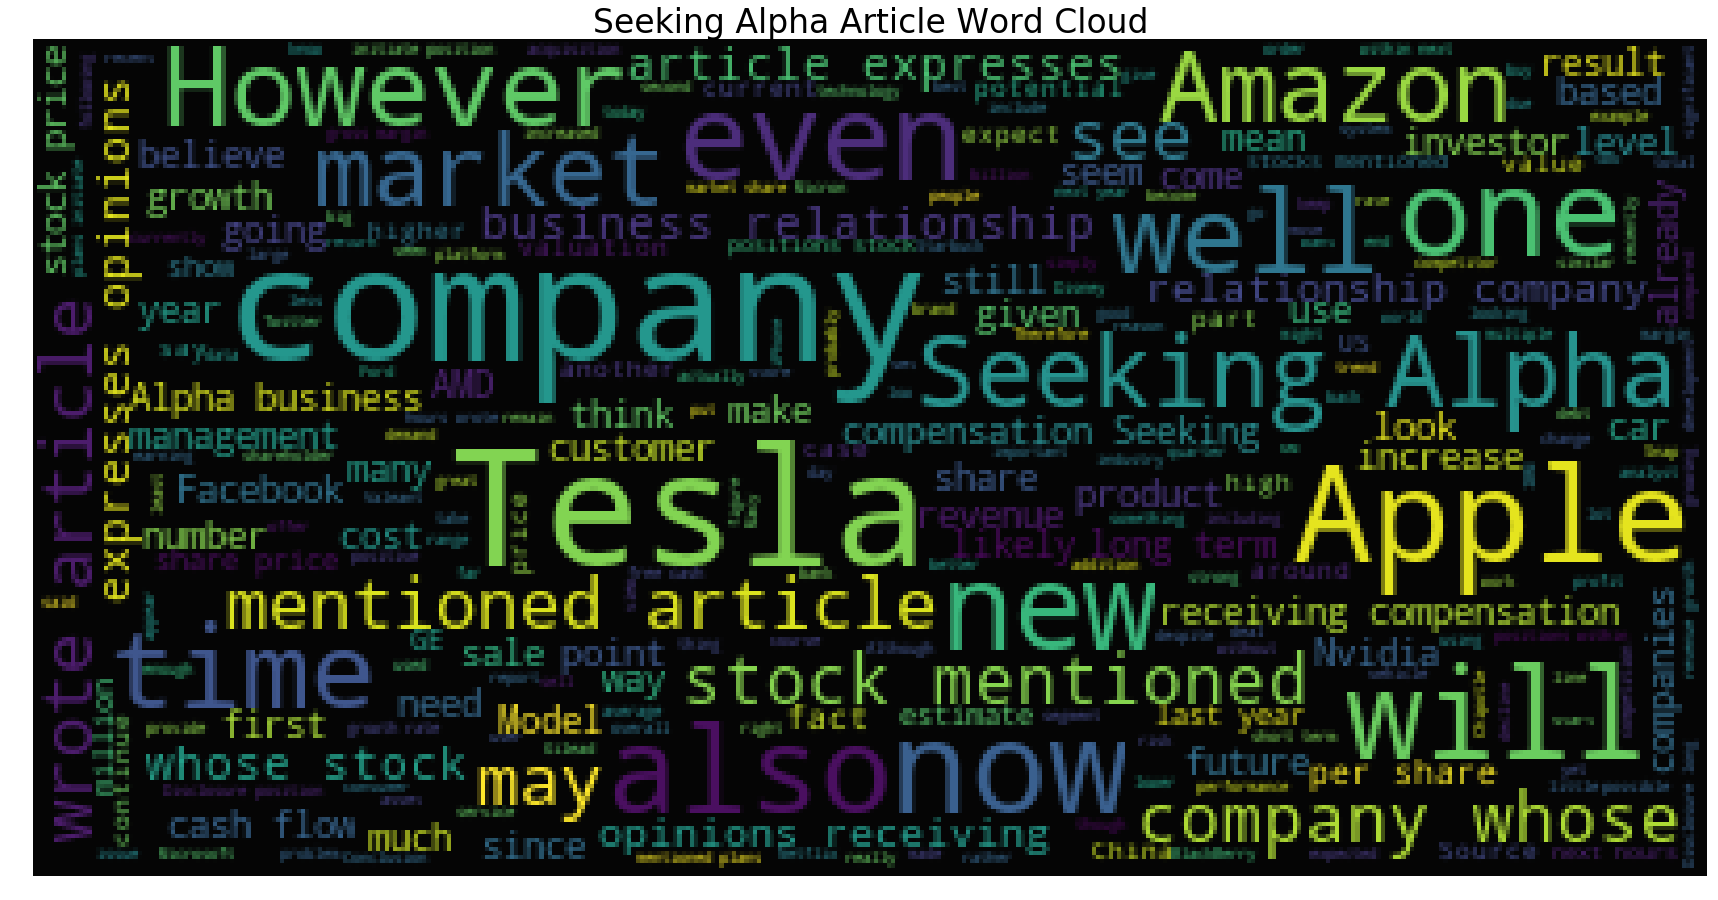

In [8]:
from wordcloud import WordCloud

plt.figure(figsize=(30,17))
wc = WordCloud(background_color="black", max_words=10000, max_font_size= 40)
wc.generate(" ".join(natural_language['0']))
plt.title("Seeking Alpha Article Word Cloud", fontsize=33)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98)
plt.axis('off')

- The Word Cloud further emphasizes the need to remove these unpredictive words 
- It's clear we must find some way to preprocess our dataset to strip out these commonly occuring words

---
## 2. Introduction to Preprocessing & Natural Language Processing
- Preprocessing steps include:
   - Removing punctuation
   - Converting to lowercase 
   - Filtering out stop words 
- Natural Language Processing explores interactions between computers and human languages 
- Utilizing the `Natural` `Language` `Toolkit` functionality 
---
#### Let's explore how these techniques can transform raw text with the first observation from scraped article content 

In [ ]:
natural_language['0']

In [9]:
# Grabbing first observation
example = natural_language['0'][0]

In [10]:
example

'Undeterred by Apple\'s (NASDAQ:AAPL) pronouncements regarding "convergence" of mobile and traditional PC devices, Neonode (NASDAQ:NEON), a Swedish company, has designed the AirBar. AirBar attaches to the bottom of the screen of a 13" MacBook Air to give it touch screen functionality. Even Apple Insider has called the experience "oddly satisfying." \n\n Source: engadget The Absurd Mac Touchscreen It was back in November that Phil Schiller, Apple\'s SVP of Worldwide Marketing took to the Internet to explain and justify Apple\'s refusal to endow Macs with touch screens. As reported by Backchannel, he had this to say:  "We think of the whole platform," he says. "If we were to do Multi-Touch on the screen of the notebook, that wouldn\'t be enough - then the desktop wouldn\'t work that way." And touch on the desktop, he says, would be a disaster. "Can you imagine a 27-inch iMac where you have to reach over the air to try to touch and do things? That becomes absurd." He also explains that su

---
   ### 2a. Removing Punctuation
- Utilizing `RegEx` (Regular expressions) to:
    - Find all punctuation 
    - Replace with blank space
    - Return only letters
---

In [11]:
import re

letters_only = re.sub("[^a-zA-Z]", " ",example) # Search for all non-letters, replace with blank space                  
print(letters_only) # Print article with punctuation removed 

Undeterred by Apple s  NASDAQ AAPL  pronouncements regarding  convergence  of mobile and traditional PC devices  Neonode  NASDAQ NEON   a Swedish company  has designed the AirBar  AirBar attaches to the bottom of the screen of a     MacBook Air to give it touch screen functionality  Even Apple Insider has called the experience  oddly satisfying      Source  engadget The Absurd Mac Touchscreen It was back in November that Phil Schiller  Apple s SVP of Worldwide Marketing took to the Internet to explain and justify Apple s refusal to endow Macs with touch screens  As reported by Backchannel  he had this to say    We think of the whole platform   he says   If we were to do Multi Touch on the screen of the notebook  that wouldn t be enough   then the desktop wouldn t work that way   And touch on the desktop  he says  would be a disaster   Can you imagine a    inch iMac where you have to reach over the air to try to touch and do things  That becomes absurd   He also explains that such a mov

---
  ### 2b. Formatting
- Converting all words to `lowercase` expressions 
- Splitting lowercase text up into indiviudal words 
---

In [12]:
# Convert to lower case, split into individual words
words = letters_only.lower().split()  
print(words)

['undeterred', 'by', 'apple', 's', 'nasdaq', 'aapl', 'pronouncements', 'regarding', 'convergence', 'of', 'mobile', 'and', 'traditional', 'pc', 'devices', 'neonode', 'nasdaq', 'neon', 'a', 'swedish', 'company', 'has', 'designed', 'the', 'airbar', 'airbar', 'attaches', 'to', 'the', 'bottom', 'of', 'the', 'screen', 'of', 'a', 'macbook', 'air', 'to', 'give', 'it', 'touch', 'screen', 'functionality', 'even', 'apple', 'insider', 'has', 'called', 'the', 'experience', 'oddly', 'satisfying', 'source', 'engadget', 'the', 'absurd', 'mac', 'touchscreen', 'it', 'was', 'back', 'in', 'november', 'that', 'phil', 'schiller', 'apple', 's', 'svp', 'of', 'worldwide', 'marketing', 'took', 'to', 'the', 'internet', 'to', 'explain', 'and', 'justify', 'apple', 's', 'refusal', 'to', 'endow', 'macs', 'with', 'touch', 'screens', 'as', 'reported', 'by', 'backchannel', 'he', 'had', 'this', 'to', 'say', 'we', 'think', 'of', 'the', 'whole', 'platform', 'he', 'says', 'if', 'we', 'were', 'to', 'do', 'multi', 'touch', '

---
  ### 3c. Removing Stop Words
- Stopwords occur too frequently to contribute to the predictive process (words such as "to" and "the", etc)
- To distinguish texts properly we should remove these words during pre-processing
- The `Natural` `Language` `Toolkit` comes with a predefined list of English stopwords 
- Let's continue on with our example article to examine how stop word removal can narrow down the scope of text.
---

In [13]:
import nltk

# Gathering list of stop words from the Natural Language Toolkit 
stopwords = nltk.corpus.stopwords.words('english')

In [14]:
print("="*90)
print('There are',len(stopwords),'English stop words in the NLTK.')
print("="*90)

There are 179 English stop words in the NLTK.


In [15]:
# Removing stop words from formatted article text 
example_stopwords_removed = [w for w in words if not w in stopwords]  

In [16]:
print("="*90)
print('There are',len(example),'in the original article text.')
print('There are',len(example_stopwords_removed),'in article text after stop word removal.')
print("="*90)

There are 7588 in the original article text.
There are 677 in article text after stop word removal.


---
## 3. Preprocess Article Text 
- Combine steps from above into function
- Apply to all scraped articles 
---

In [17]:
# Intitializing function to apply all preprocessing steps to article text 
def article_to_words(raw_article_text):
    # input - single string (uncleaned) 
    # output - single string (cleaned/preprocessed)
    #
    # 1. Removing non-letters 
    letters_only = re.sub("[^a-zA-Z]", " ", raw_article_text)                  
    #
    # 2. Converting to lower case, splitting into individual words
    words = letters_only.lower().split()                             
    #
    # 3. Removing stop words
    meaningful = [w for w in words if not w in stopwords]  
    #
    return(meaningful)

---
#### Applying Preprocessing Function to:
1. Determining range to iterate over via length of dataframe 
2. Creating empty list to append cleaned article text to 
3. Incrementally printing progress message 
---

In [18]:
print("Cleaning and parsing the training set movie reviews...\n")

# Grabbing number of articles via dataframe size to iterate through 
num_articles = natural_language['0'].size

# Intiializing empty list to hold cleaned articles 
clean_articles = [] # Empty list to hold cleaned articles 

for i in range( 0, num_articles): # Iterating through list 
    if( (i+1)%250 == 0 ): #
        print("Article %d of %d\n" % ( i+1, num_articles)) # Printing message every 250 messages                                                                   
    # Appending cleaned articles to empty list 
    clean_articles.append(article_to_words(natural_language.loc[i,'0'])) 

Cleaning and parsing the training set movie reviews...

Article 250 of 2985

Article 500 of 2985

Article 750 of 2985

Article 1000 of 2985

Article 1250 of 2985

Article 1500 of 2985

Article 1750 of 2985

Article 2000 of 2985

Article 2250 of 2985

Article 2500 of 2985

Article 2750 of 2985



---
#### Let's check this out on our example article:
---

In [39]:
clean_articles[:3]

[['undeterred',
  'apple',
  'nasdaq',
  'aapl',
  'pronouncements',
  'regarding',
  'convergence',
  'mobile',
  'traditional',
  'pc',
  'devices',
  'neonode',
  'nasdaq',
  'neon',
  'swedish',
  'company',
  'designed',
  'airbar',
  'airbar',
  'attaches',
  'bottom',
  'screen',
  'macbook',
  'air',
  'give',
  'touch',
  'screen',
  'functionality',
  'even',
  'apple',
  'insider',
  'called',
  'experience',
  'oddly',
  'satisfying',
  'source',
  'engadget',
  'absurd',
  'mac',
  'touchscreen',
  'back',
  'november',
  'phil',
  'schiller',
  'apple',
  'svp',
  'worldwide',
  'marketing',
  'took',
  'internet',
  'explain',
  'justify',
  'apple',
  'refusal',
  'endow',
  'macs',
  'touch',
  'screens',
  'reported',
  'backchannel',
  'say',
  'think',
  'whole',
  'platform',
  'says',
  'multi',
  'touch',
  'screen',
  'notebook',
  'enough',
  'desktop',
  'work',
  'way',
  'touch',
  'desktop',
  'says',
  'would',
  'disaster',
  'imagine',
  'inch',
  'imac'

---
## 4. Cleaned Analysis

_Revisting Top 50 Frequencies_

---

(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]), <a list of 10 Text yticklabel objects>)

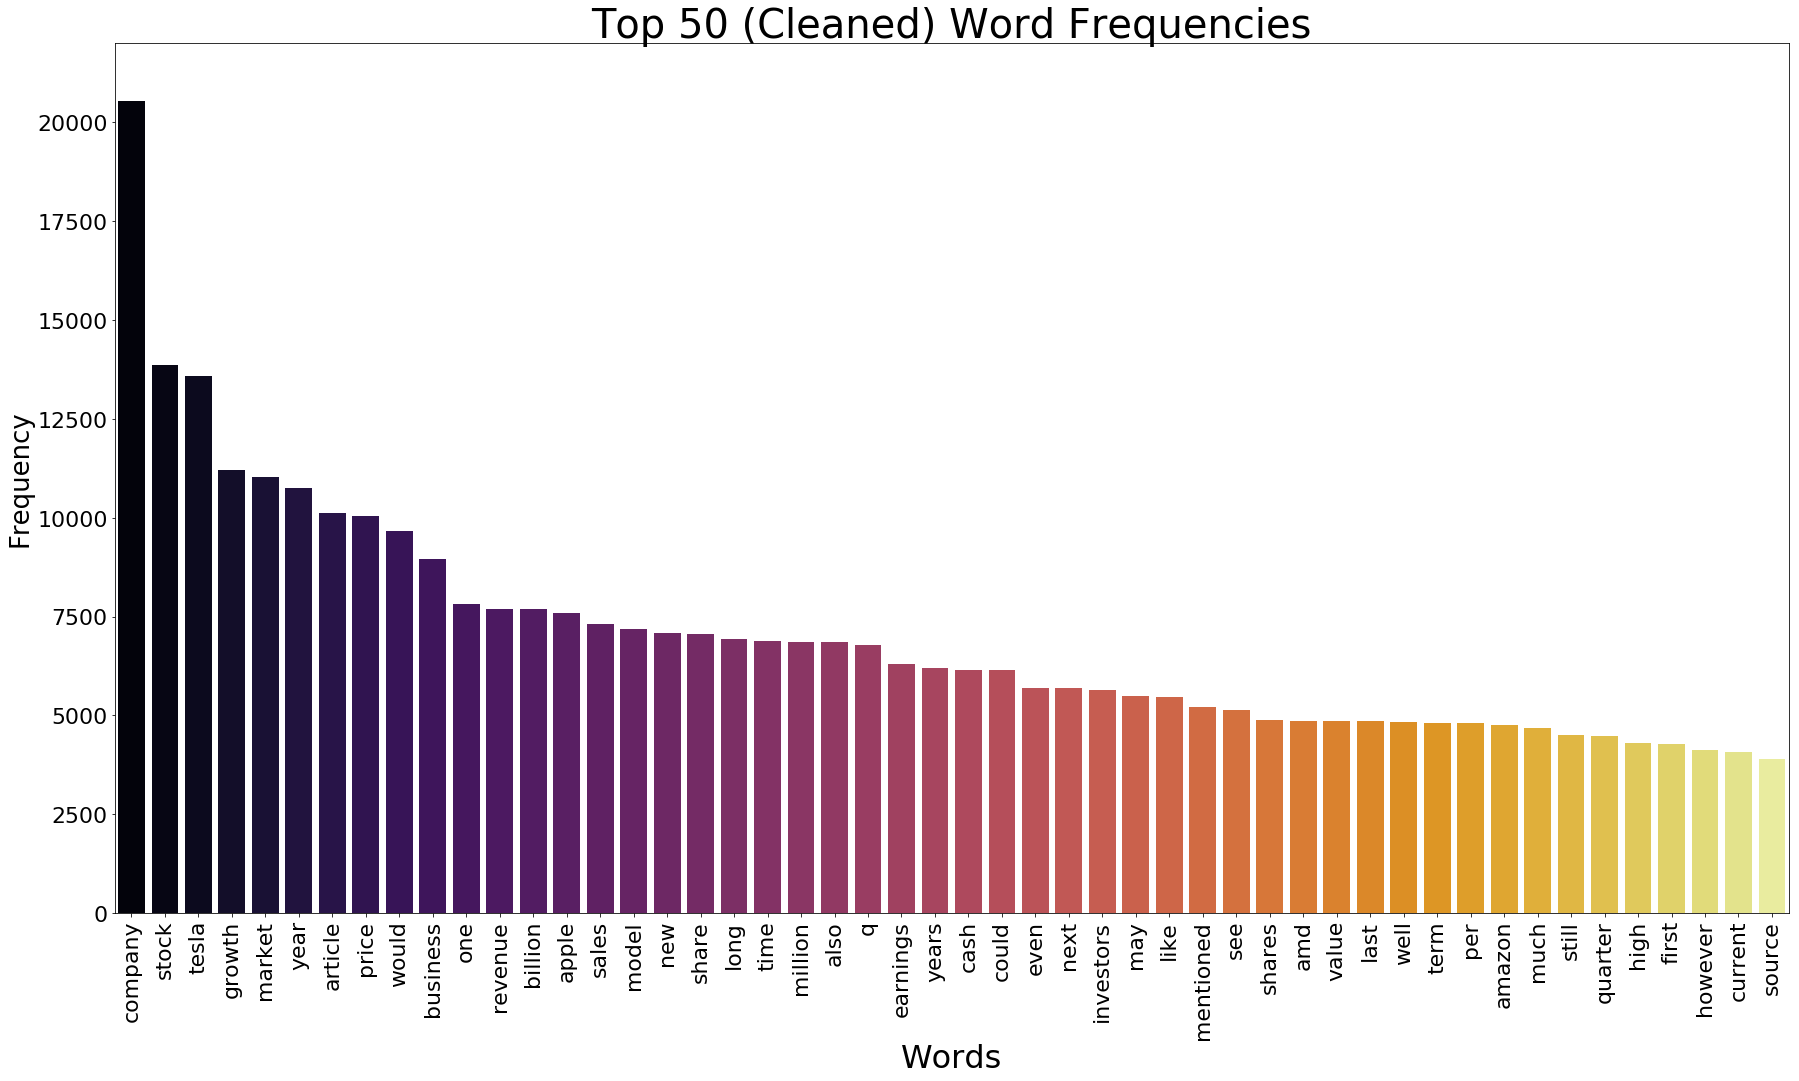

In [22]:
import itertools

# Compiling list of all cleaned article text from 'natural_language'
#
# Joining all articles 
natural_language_cleaned = list(itertools.chain.from_iterable(clean_articles))
#
# Calculating value counts for each word- Top 50 frequenices 
#
# Converting list into dataframe
natural_language_cleaned = pd.DataFrame(natural_language_cleaned)
#
# Unstacking to grab value counts 
natural_language_cleaned = natural_language_cleaned.unstack().value_counts().head(50)

# Creating bar graph to visualize

plt.figure(figsize=(30,16))
sns.barplot(x = natural_language_cleaned.index.values,
            y = natural_language_cleaned.values,
            palette= 'inferno')

plt.xlabel('Words',fontsize=32)
plt.ylabel('Frequency',fontsize=26)
plt.ylim(0,22000)
plt.title('Top 50 (Cleaned) Word Frequencies',fontsize=40)
plt.xticks(rotation=90,fontsize=22)
plt.yticks(fontsize=22)

In [23]:
natural_language_cleaned[:11]

company     20538
stock       13869
tesla       13572
growth      11196
market      11023
year        10745
article     10130
price       10048
would        9654
business     8947
one          7813
dtype: int64

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer

In [26]:
cvec = CountVectorizer()

In [40]:
cvec.fit([clean_articles])

AttributeError: 'list' object has no attribute 'lower'

In [33]:
all_text = " ".join(natural_language['0'])

In [34]:
cvec = CountVectorizer()

In [35]:
cvec.fit(all_text)

ValueError: Iterable over raw text documents expected, string object received.